In [14]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet.utilities import regressor_coefficients

import pickle


In [2]:
df = pd.read_csv('dataset.csv', sep=',')
df = df.fillna(0)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

<Axes: xlabel='Date'>

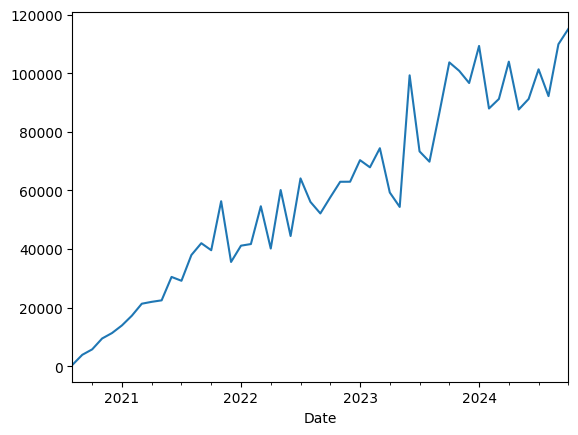

In [4]:
df.set_index('Date')['Ex-Factory volumes'].plot()

**Why Remove Collinearity in Time Series Forecasting?**  

- **Improves model stability**: Prevents unstable or unreliable coefficients.  
- **Enhances prediction accuracy**: Reduces overfitting and improves generalization.  
- **Increases interpretability**: Clarifies the impact of each regressor.  
- **Avoids redundancy**: Removes unnecessary or duplicate information.  
- **Boosts efficiency**: Simplifies the model and reduces computational complexity.  

In [16]:
regressors = ['BRISTOR_Email',
       'BRISTOR_Face to face call', 'BRISTOR_Mail', 'BRISTOR_Remote call',
       'BRISTOR_Telephone', 'BRISTOR_Indication A_Days of Treatment',
       'BRISTOR_Indication B_Days of Treatment',
       'Competitors_Indication A_Days of Treatment',
       'BRISTOR_Indication A_New Patient #',
       'BRISTOR_Indication A_New Patient %',
       'BRISTOR_Indication A_Total patients #',
       'BRISTOR_Indication A_Total patients %',
       'BRISTOR_Indication B_New Patient #',
       'BRISTOR_Indication B_New Patient %',
       'BRISTOR_Indication B_Total patients #',
       'BRISTOR_Indication B_Total patients %',
       'Competitors_Indication A_New Patient #',
       'Competitors_Indication A_New Patient %',
       'Competitors_Indication A_Total patients #',
       'Competitors_Indication A_Total patients %',
       'Competitors_Indication B_New Patient #',
       'Competitors_Indication B_New Patient %',
       'Competitors_Indication B_Total patients #',
       'Competitors_Indication B_Total patients %', 'BRISTOR_Indication A',
       'BRISTOR_Indication B', 'Competitors_Indication A']


Original Regressors: 27
Filtered Regressors: 7
Deleted Regressors: {'Competitors_Indication B_Total patients %', 'BRISTOR_Indication B_Total patients %', 'Competitors_Indication A_Total patients %', 'Competitors_Indication B_Total patients #', 'Competitors_Indication A_New Patient %', 'BRISTOR_Indication B_New Patient #', 'BRISTOR_Indication B', 'BRISTOR_Indication B_New Patient %', 'Competitors_Indication A_New Patient #', 'Competitors_Indication A_Total patients #', 'Competitors_Indication A', 'BRISTOR_Indication B_Total patients #', 'BRISTOR_Indication A_Total patients %', 'BRISTOR_Indication A', 'Competitors_Indication B_New Patient %', 'BRISTOR_Indication A_New Patient %', 'BRISTOR_Indication B_Days of Treatment', 'Competitors_Indication B_New Patient #', 'BRISTOR_Indication A_Days of Treatment', 'BRISTOR_Indication A_Total patients #'}


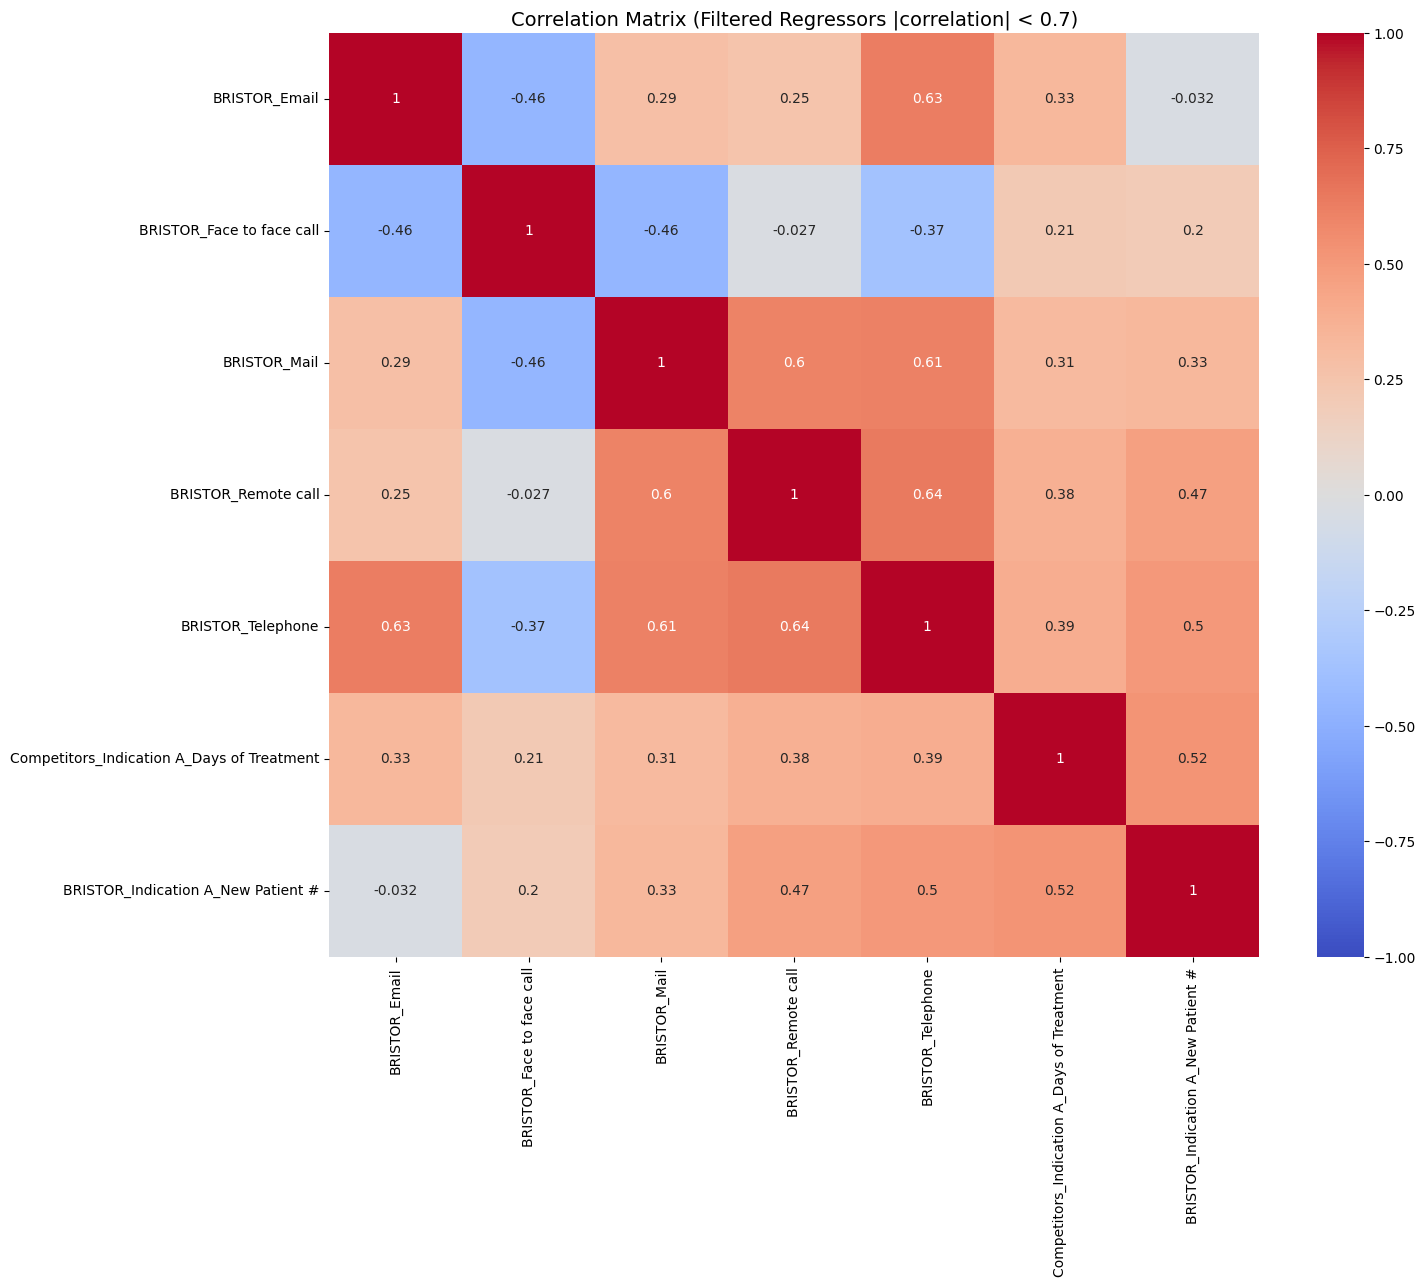

In [19]:
corr_matrix = df[regressors].corr()

correlated_features = set()
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)


regressors_filtered = [col for col in regressors if col not in correlated_features]

print(f"Original Regressors: {len(regressors)}")
print(f"Filtered Regressors: {len(regressors_filtered)}")
print(f"Deleted Regressors: {correlated_features}")


filtered_corr = df[regressors_filtered].corr()
filtered_corr = filtered_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)


plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix (Filtered Regressors |correlation| < 0.7)', fontsize=14)
plt.show()

In [9]:
correlated_features = set() 
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  
            correlated_features.add(colname)

regressors_filtered = [col for col in regressors if col not in correlated_features]


print(f"Original Regressor: {len(regressors)}")
print(f"Frlitered Regressor: {len(regressors_filtered)}")
print(f"Delated Regressor: {correlated_features}")
df_filtered = df[regressors_filtered]

Original Regressor: 27
Frlitered Regressor: 7
Delated Regressor: {'Competitors_Indication B_Total patients %', 'BRISTOR_Indication B_Total patients %', 'Competitors_Indication A_Total patients %', 'Competitors_Indication B_Total patients #', 'Competitors_Indication A_New Patient %', 'BRISTOR_Indication B_New Patient #', 'BRISTOR_Indication B', 'BRISTOR_Indication B_New Patient %', 'Competitors_Indication A_New Patient #', 'Competitors_Indication A_Total patients #', 'Competitors_Indication A', 'BRISTOR_Indication B_Total patients #', 'BRISTOR_Indication A_Total patients %', 'BRISTOR_Indication A', 'Competitors_Indication B_New Patient %', 'BRISTOR_Indication A_New Patient %', 'BRISTOR_Indication B_Days of Treatment', 'Competitors_Indication B_New Patient #', 'BRISTOR_Indication A_Days of Treatment', 'BRISTOR_Indication A_Total patients #'}


### COEFFICIENTS
- **BRISTOR_Email: -10.09**  
Each unit increase in this regressor decreases the forecast by 10.09 units. This indicates a direct negative impact.

- **BRISTOR_Face to face call: 0.03**  
A very small positive impact: each additional unit of this regressor increases the forecast by about 0.03 units. This value is negligible compared to other regressors.

- **BRISTOR_Mail: -2.72**  
Each unit increase in this regressor reduces the forecast by 2.72 units. It has a moderate negative impact.

- **BRISTOR_Remote call: 164.28**  
This is the regressor with the highest positive impact. Each additional unit increases the forecast by 164.28 units. It is likely one of the most important variables in the model.

- **BRISTOR_Telephone: 63.88**  
Each additional unit of this regressor increases the forecast by 63.88 units, indicating a significant positive impact.

- **Competitors_Indication A_Days of Treatment: 0.00169**  
A very small positive impact, negligible compared to other regressors.

- **BRISTOR_Indication A_New Patient #: -33.31**  
Each unit increase in this regressor reduces the forecast by 33.31 units, indicating a significant negative impact.

In [15]:
#Reload the model
with open('prophet_model.pkl', 'rb') as f:
    m = pickle.load(f)

coefficients = regressor_coefficients(m)
coefficients


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,BRISTOR_Email,additive,5.343725e+02,-10.090703,-10.090703,-10.090703
1,BRISTOR_Face to face call,additive,1.376176e+03,0.031099,0.031099,0.031099
2,BRISTOR_Mail,additive,6.252157e+02,-2.723232,-2.723232,-2.723232
3,BRISTOR_Remote call,additive,2.331373e+01,164.276731,164.276731,164.276731
4,BRISTOR_Telephone,additive,1.450588e+02,63.888851,63.888851,63.888851
5,Competitors_Indication A_Days of Treatment,additive,3.283727e+06,0.001690,0.001690,0.001690
6,BRISTOR_Indication A_New Patient #,additive,1.117647e+02,-33.308174,-33.308174,-33.308174
